In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./train.csv')

In [4]:
df.drop('SAMPLE_ID', axis=1, inplace=True)

| Variable           | Description                                                          | Unit    |
|:-------------------|:---------------------------------------------------------------------|:--------|
| ARI_CO             | 도착항의 소속국가(도착항 앞 2글자)                                   |         |
| ARI_PO             | 도착항의 항구명(도착항 뒤 글자)                                      |         |
| SHIP_TYPE_CATEGORY | 선종 통합 바탕으로 5대 선종으로 분류                                 |         |
| DIST               | 정박지(ber_port)와 접안지 사이의 거리                                | km      |
| ATA                | anc_port에 도착한 시점의 utc. 실제 정박 시각(Actual Time of Arrival) | hour    |
| ID                 | 선박식별 일련번호                                                    |         |
| BREADTH            | 선박의 폭                                                            | m       |
| BUILT              | 선박의 연령                                                          | year    |
| DEADWEIGHT         | 선박의 재화중량톤수                                                  | ton     |
| DEPTH              | 선박의 깊이                                                          | m       |
| DRAUGHT            | 흘수 높이                                                            | m       |
| GT                 | 용적톤수(Gross Tonnage)값                                            | GT(m^3) |
| LENGTH             | 선박의 길이                                                          | m       |
| SHIPMANAGER        | 선박 소유주                                                          |         |
| FLAG               | 선박의 국적                                                          |         |
| U_WIND             | 풍향 u벡터                                                           | m/s     |
| V_WIND             | 풍향 v벡터                                                           | m/s     |
| AIR_TEMPERATURE    | 기온                                                                 | ºC      |
| BN                 | 보퍼트 풍력 계급                                                     |         |
| ATA_LT             | anc_port에 도착한 시점의 현지 정박 시각(Local Time of Arrival)       | hour    |
| PORT_SIZE          | 접안지 폴리곤 영역의 크기                                            | km^2    |
| CI_HOUR            | 대기시간 

In [5]:
df.columns

Index(['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'DIST', 'ATA', 'ID',
       'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH',
       'SHIPMANAGER', 'FLAG', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN',
       'ATA_LT', 'DUBAI', 'BRENT', 'WTI', 'BDI_ADJ', 'PORT_SIZE', 'CI_HOUR'],
      dtype='object')

In [6]:
df['ARI_CO'].unique()

array(['CN', 'JP', 'RU', 'AU', 'SG', 'ZA', 'KR', 'TW', 'TT', 'ID', 'BR',
       'QA', 'LV', 'MZ', 'US', 'IN', 'UA', 'CA', 'MY', 'PE', 'VN', 'FI',
       'CL', 'VE', 'PH'], dtype=object)

In [7]:
for i in df.columns:
    print(i)
    print(len(df[i].unique()))
    print('----------------')
    
print('데이터 총 개수 : ',len(df))

ARI_CO
25
----------------
ARI_PO
103
----------------
SHIP_TYPE_CATEGORY
4
----------------
DIST
219708
----------------
ATA
317850
----------------
ID
24764
----------------
BREADTH
7
----------------
BUILT
62
----------------
DEADWEIGHT
1961
----------------
DEPTH
5
----------------
DRAUGHT
4
----------------
GT
1780
----------------
LENGTH
38
----------------
SHIPMANAGER
6511
----------------
FLAG
123
----------------
U_WIND
2619
----------------
V_WIND
2945
----------------
AIR_TEMPERATURE
704
----------------
BN
78038
----------------
ATA_LT
24
----------------
DUBAI
1789
----------------
BRENT
1850
----------------
WTI
1785
----------------
BDI_ADJ
2010
----------------
PORT_SIZE
101
----------------
CI_HOUR
169615
----------------
데이터 총 개수 :  367441


In [8]:
df.describe()

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
count,367441.000000,367440.000000,367441.000000,367441.000000,367440.000000,367440.000000,367441.000000,367440.000000,213955.000000,213955.000000,213076.000000,213955.000000,367441.000000,367441.000000,367441.00000,367441.000000,367441.000000,367441.000000,367441.000000
mean,19.315929,30.550239,14.746082,63588.867056,16.476540,11.086708,41346.606612,205.114468,-0.297587,-0.262955,18.867344,2.706476,11.837903,65.533814,67.55712,63.209494,1348.251333,0.000877,61.877118
std,30.903272,10.957441,7.040392,63558.705308,6.047015,4.600020,39311.578997,75.867383,3.365912,3.735113,9.727090,1.387629,6.645665,20.916641,20.98516,20.630433,738.961048,0.000838,170.575224
min,0.000000,10.000000,0.000000,100.000000,0.000000,0.000000,150.000000,20.000000,-25.330000,-21.450000,-32.200000,0.000000,0.000000,13.520000,19.33000,-37.630000,286.802297,0.000005,0.000000
25%,0.000000,20.000000,10.000000,14400.000000,10.000000,10.000000,10000.000000,150.000000,-2.150000,-2.280000,12.200000,1.804286,7.000000,50.020000,51.46000,48.360000,836.349201,0.000142,0.000000
50%,6.929929,30.000000,13.000000,47400.000000,20.000000,10.000000,30700.000000,190.000000,-0.130000,0.000000,21.600000,2.618063,12.000000,62.930000,64.62000,59.140000,1187.573732,0.000552,7.949444
75%,25.693063,40.000000,18.000000,81400.000000,20.000000,10.000000,52100.000000,260.000000,1.540000,2.000000,26.600000,3.556008,17.000000,76.880000,79.30000,74.250000,1660.987616,0.001614,49.153333
max,199.980651,60.000000,80.000000,404000.000000,30.000000,20.000000,237000.000000,400.000000,17.910000,29.690000,47.600000,11.179660,23.000000,127.860000,127.98000,123.700000,4795.865609,0.002615,2159.130556


In [9]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

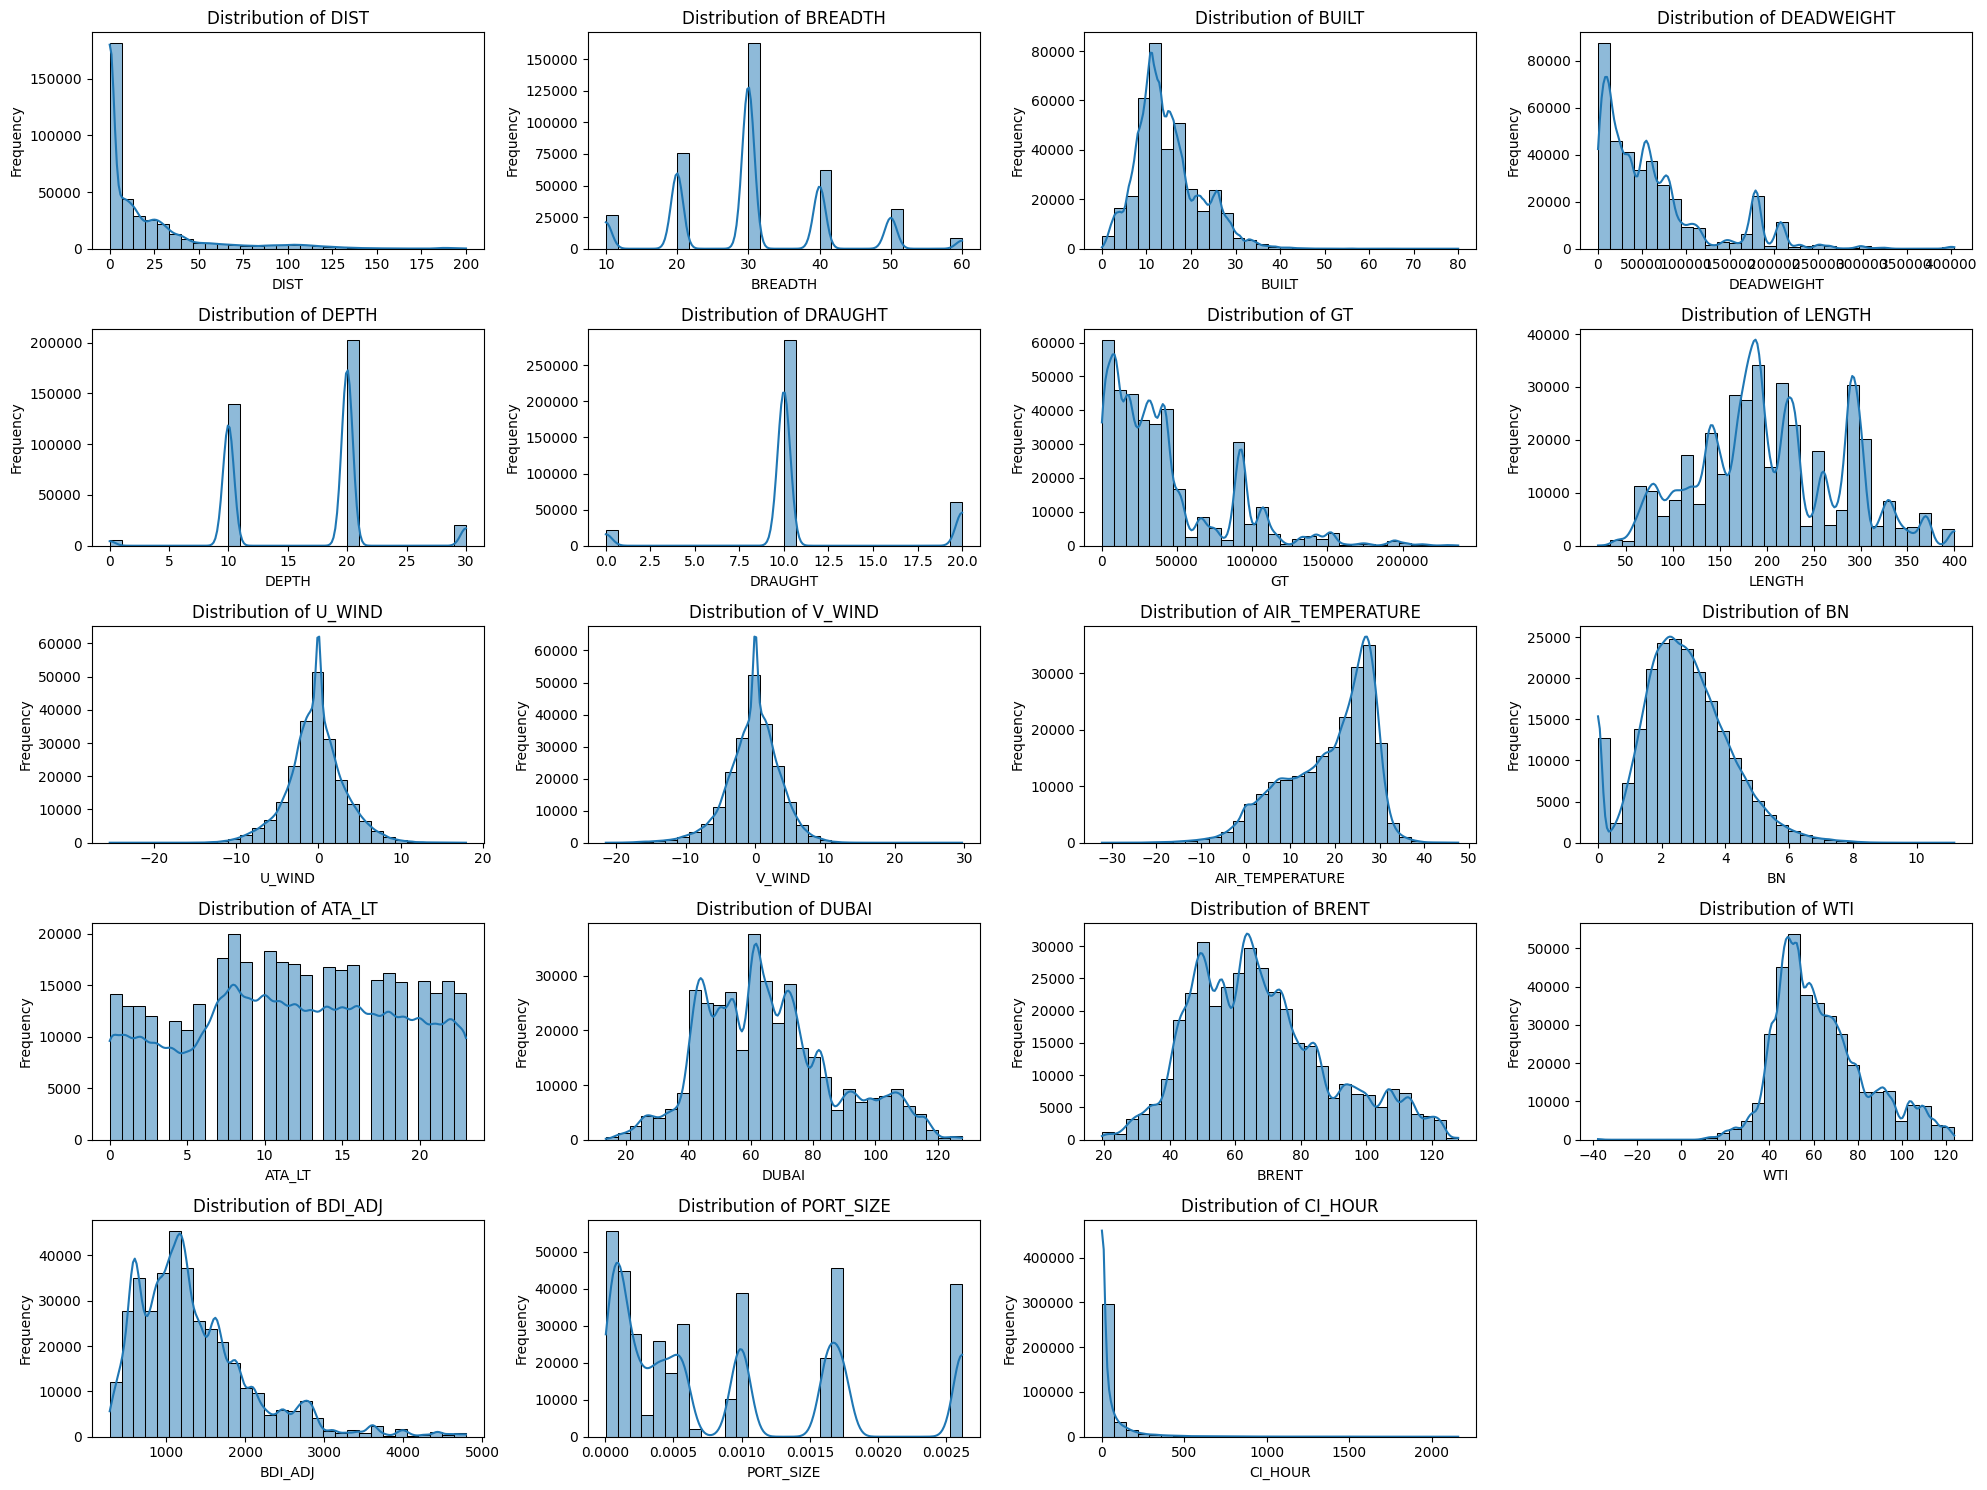

In [10]:
# 샘플링된 데이터로 수치형 변수의 분포를 확인
plt.figure(figsize = (20, 15))

for i, var in enumerate(numeric_columns):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[var], bins = 30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
categorical_vars = df.select_dtypes(include = ['object']).columns

plt.figure(figsize=(15, 10))

for i, var in enumerate(categorical_vars):
    plt.subplot(2, 2, i+1)
    sns.countplot(y = var, data = df, order = df[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xlabel('Count')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

In [12]:
categorical_vars

Index(['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'ATA', 'ID', 'SHIPMANAGER',
       'FLAG'],
      dtype='object')

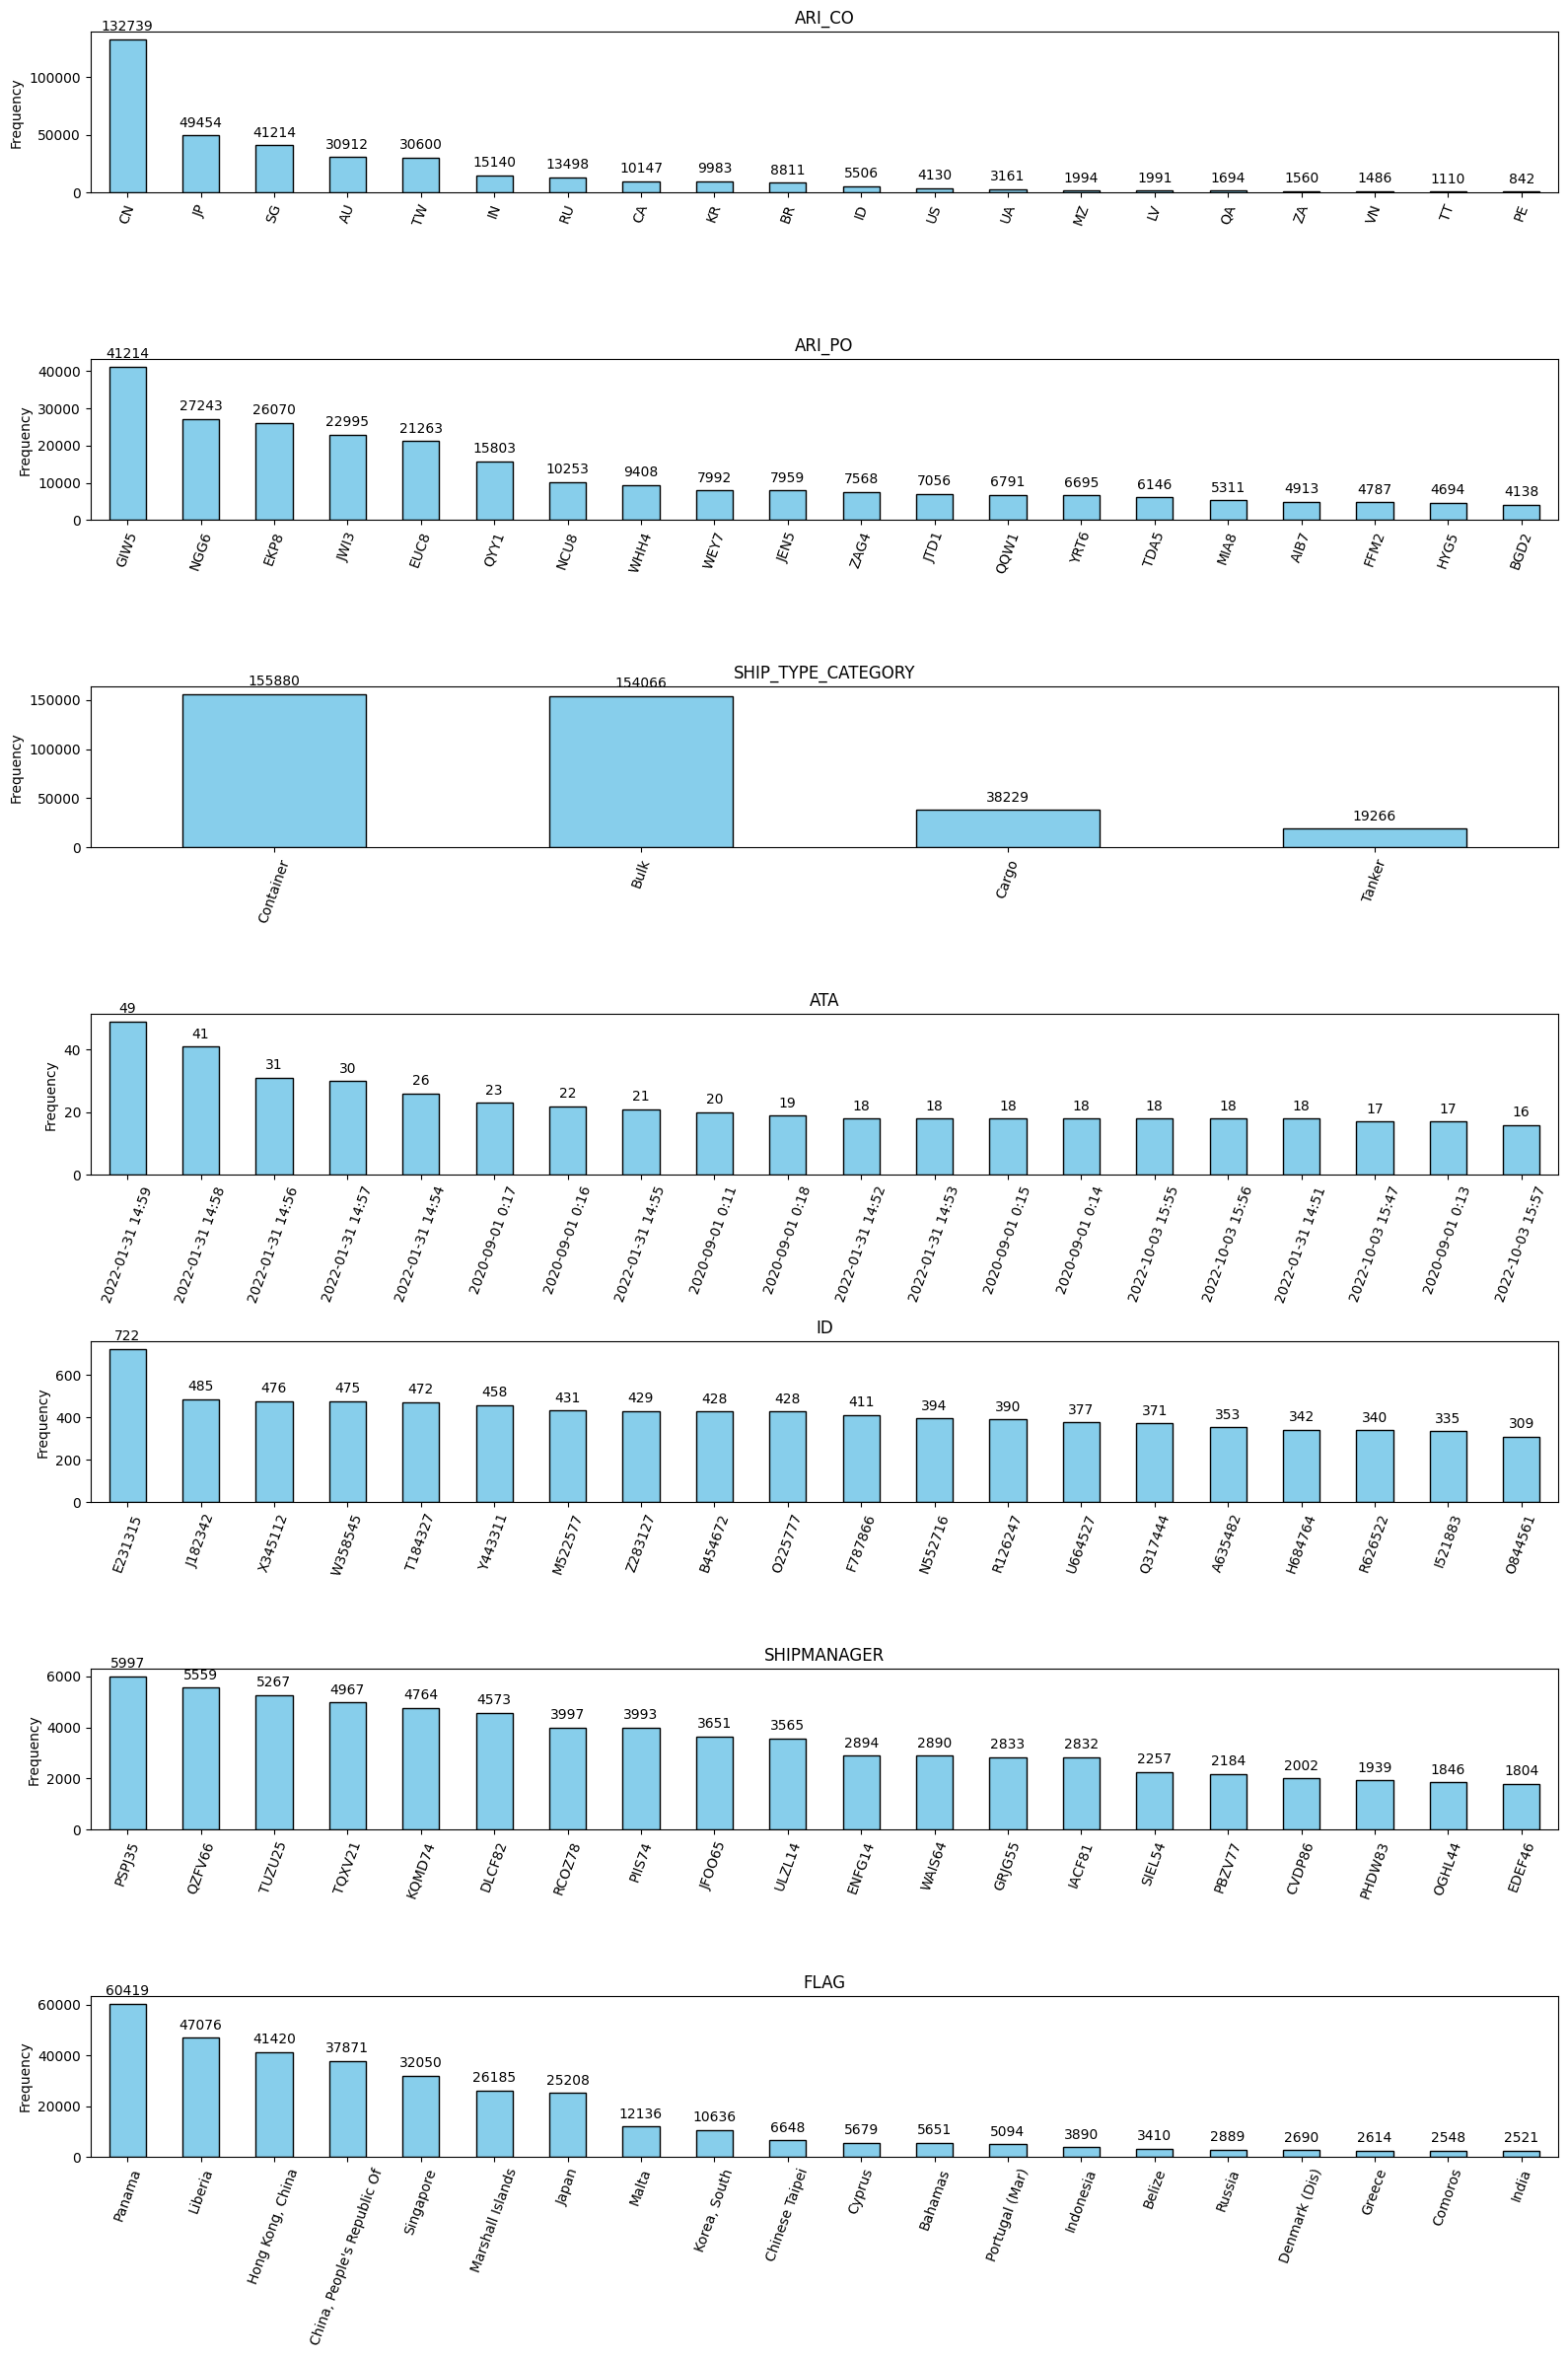

In [22]:
# 위에 코드 너무 오래걸려서 top n개 선정해서 plot

top_n = 20

plt.figure(figsize=(16, 24))

for i, cat_var in enumerate(categorical_vars):
    # 상위 N개의 고유한 값과 그 빈도를 선택합니다.
    top_values = df[cat_var].value_counts().nlargest(top_n)
    
    ax = plt.subplot(len(categorical_vars), 1, i+1)
    top_values.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(cat_var)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    
    # 각 막대 위에 값을 표시
    for p in ax.patches:
        ax.annotate(str(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

# 그래프를 화면에 표시합니다.
plt.tight_layout()
plt.show()

In [14]:
cor = df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_19296\2226764872.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


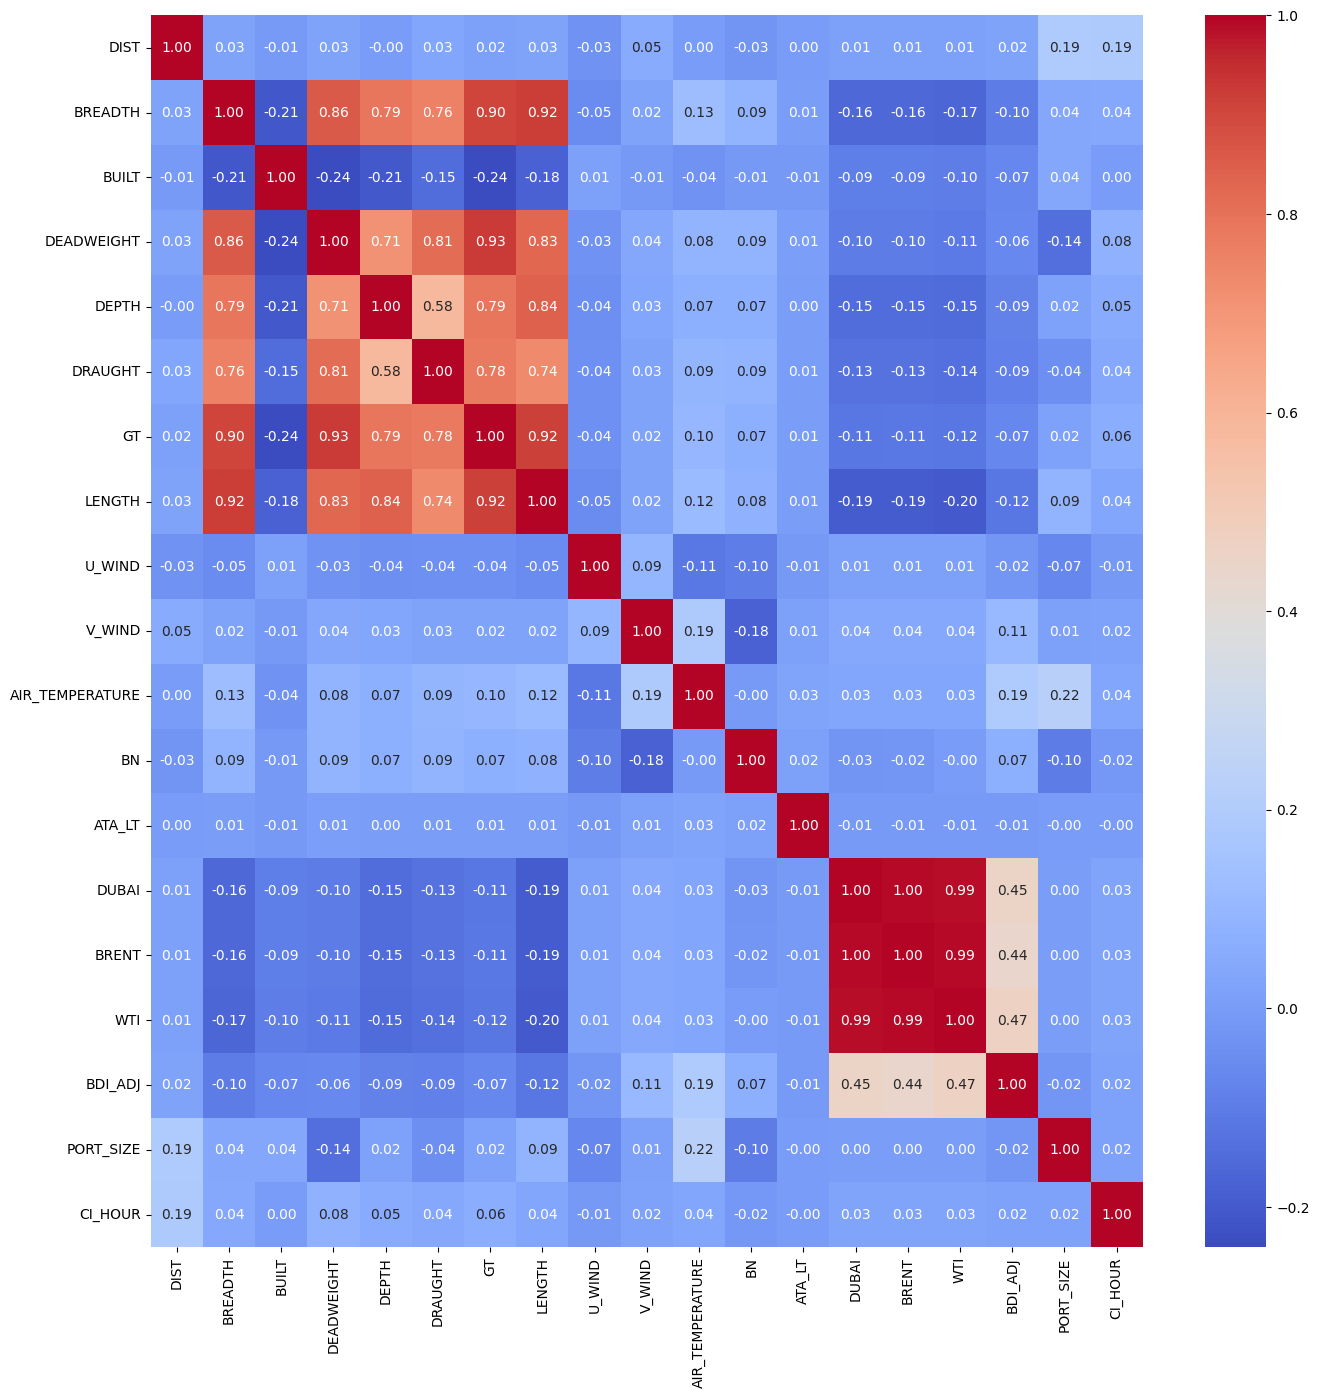

In [15]:
plt.figure(figsize = (16,16))
sns.heatmap(cor, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

In [16]:
correlations = df[numeric_columns].corr()['CI_HOUR'].drop('CI_HOUR').sort_values(ascending=False)

In [17]:
correlations

DIST               0.189469
DEADWEIGHT         0.078274
GT                 0.059959
DEPTH              0.052184
BREADTH            0.043974
DRAUGHT            0.040560
LENGTH             0.035531
AIR_TEMPERATURE    0.035520
WTI                0.029377
DUBAI              0.029129
BRENT              0.029091
PORT_SIZE          0.020102
BDI_ADJ            0.019690
V_WIND             0.017608
BUILT              0.001588
ATA_LT            -0.000283
U_WIND            -0.012149
BN                -0.016452
Name: CI_HOUR, dtype: float64